In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, hstack, join
import fitsio
# from astropy.io import fits

sys.path.append(os.path.expanduser('~/git/Python/user_modules/'))
from match_coord import match_coord

In [2]:
params = {'legend.fontsize': 'large',
          'axes.labelsize': 'large',
          'axes.titlesize': 'large',
          'xtick.labelsize': 'large',
          'ytick.labelsize': 'large',
          'figure.facecolor': 'w'}
plt.rcParams.update(params)

In [6]:
truth = Table(fitsio.read('/global/cfs/cdirs/desi/users/rongpu/imaging_mc/truth/cosmos_truth_clean.fits'))

# from https://www.legacysurvey.org/dr9/catalogs/#galactic-extinction-coefficients
ext_coeffs = {'u': 3.995, 'g': 3.214, 'r': 2.165, 'i': 1.592, 'z': 1.211, 'y': 1.064}
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    truth['gfibermag'] = 22.5 - 2.5*np.log10(truth['fiberflux_g']) - ext_coeffs['g'] * truth['ebv']

mask = truth['gfibermag']<25.1
truth = truth[mask]
print('truth', len(truth))

truth 212025


In [7]:
main_dir = '/global/cfs/cdirs/desi/users/rongpu/targets/dr9.0/1.1.1/resolve'
tmp = Table(fitsio.read(os.path.join(main_dir, 'dr9_elg_1.1.1_basic.fits'), columns=['RA', 'DEC', 'DESI_TARGET']))
tmp2 = Table(fitsio.read(os.path.join(main_dir, 'dr9_elg_1.1.1_elgmask_v1.fits.gz')))
elg = hstack([tmp, tmp2])

In [8]:
ramin, ramax, decmin, decmax = 148, 152, 0, 4
mask = (elg['RA']>ramin) & (elg['RA']<ramax) & (elg['DEC']>decmin) & (elg['DEC']<decmax)
elg = elg[mask]

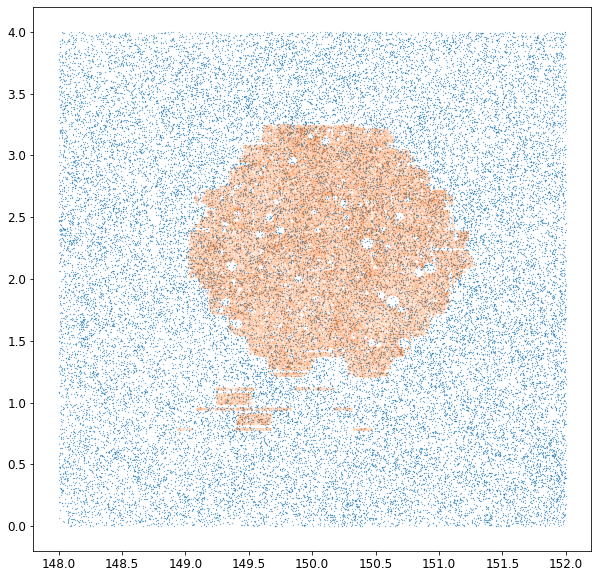

In [9]:
plt.figure(figsize=(10, 10))
plt.plot(elg['RA'], elg['DEC'], '.', ms=0.5)
plt.plot(truth['ra'], truth['dec'], '.', ms=0.05)
plt.show()

Doubly matched objects = 0
Final matched objects = 8163


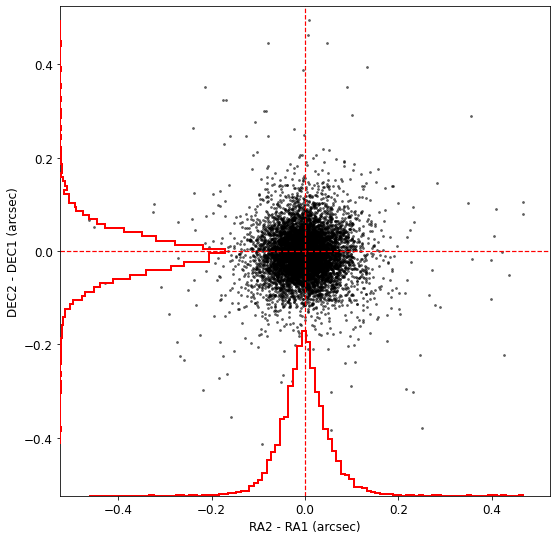

In [10]:
idx1, idx2, d2d, d_ra, d_dec = match_coord(truth['ra'], truth['dec'], elg['RA'], elg['DEC'], search_radius=0.5, plot_q=True)

In [11]:
mask = elg['DESI_TARGET'][idx2] & 2**5 > 0
print(np.sum(mask))

area = np.sum(mask)/1950
print('Area: {:.2f}'.format(area))

6486
Area: 3.33


In [12]:
truth_density = len(truth)/area
print('Density: {:.0f}'.format(truth_density))

Density: 63745
